In [ ]:
!pip install pymysql

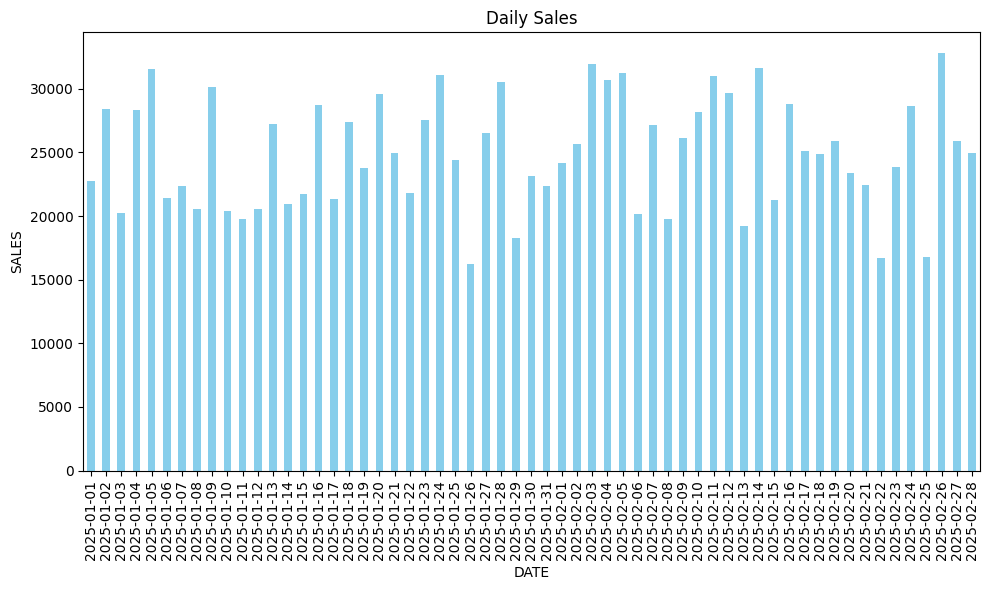

流程完成 ✅


In [1]:
# main.py
import pandas as pd
from file_define import TxtFileReader, JsonFileReader
from sql_handle import (
    mysql_connection,
    create_database,
    use_database,
    create_sales_table,
    insert_data,
    read_sales_data
)
from data_viz import plot_sales_by_day

# 1️⃣ 读取本地文件并清洗
txt_reader = TxtFileReader("data/january_sales.txt")
json_reader = JsonFileReader("data/february_sales.json")

df_txt = txt_reader.read_data()
df_json = json_reader.read_data()

# 合并数据
df = pd.concat([df_txt, df_json], ignore_index=True)

# 2️⃣ 连接数据库并创建数据库/表
conn = mysql_connection(password="19720924")
create_database(conn, "test_db")
use_database(conn, "test_db")
create_sales_table(conn)

# 3️⃣ 将数据插入数据库
insert_data(conn, df)

# 4️⃣ 从数据库读取数据
df_from_db = read_sales_data(conn)

# 5️⃣ 可视化
plot_sales_by_day(df_from_db)

# 6️⃣ 关闭数据库连接
conn.close()

print("流程完成 ✅")
